In HP-Omen: tf-gpu

In [1]:
# !pip install tensorflow==1.15.2

In [1]:
%%time
# %run main.py --learning_rate=0.001 --training_epoch=100 --gru_units=64 --seq_len=12 --pre_len=1 --train_rate=0.8 --batch_size=32 --dataset=sz --model_name=tgcn
%run main.py --dataset=sz --training_epoch=150 --pre_len=3

(1920, 156)



Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API




The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor








Iter:0 train_rmse:6.8 test_loss:1.184e+03 test_rmse:0.1171 test_acc:0.4944
Iter:1 train_rmse:5.916 test_loss:939.7 test_rmse:0.1043 test_acc:0.5496
Iter:2 train_rmse:5.693 test_loss:876.8 test_rmse:0.1007 test_acc:0.5649
Iter:3 train_rmse:5.531 t

<Figure size 700x150 with 1 Axes>

<Figure size 700x150 with 1 Axes>

<Figure size 500x300 with 1 Axes>

<Figure size 500x300 with 1 Axes>

<Figure size 500x300 with 1 Axes>

<Figure size 500x300 with 1 Axes>

<Figure size 500x300 with 1 Axes>

<Figure size 500x300 with 1 Axes>

min_rmse:4.642950272043679 min_mae:3.3305109 max_acc:0.6754918098449707 r2:0.80418661236763 var:0.8045419901609421
Wall time: 33min 34s


ماتریس 
results N x d

N: Number of test instances (time instances): 384 = 1920*.2

d: Number of locations (156)

In [1]:
%%time
%run main.py --dataset=sz --adjacency_matrix=gsl --training_epoch=150 --pre_len=3

(1920, 156)



Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API




The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor








Iter:0 train_rmse:11.26 test_loss:2.9e+03 test_rmse:0.1832 test_acc:0.2086
Iter:1 train_rmse:6.606 test_loss:1.127e+03 test_rmse:0.1142 test_acc:0.5067
Iter:2 train_rmse:5.898 test_loss:934.0 test_rmse:0.104 test_acc:0.5509
Iter:3 train_rmse:5.69

<Figure size 700x150 with 1 Axes>

<Figure size 700x150 with 1 Axes>

<Figure size 500x300 with 1 Axes>

<Figure size 500x300 with 1 Axes>

<Figure size 500x300 with 1 Axes>

<Figure size 500x300 with 1 Axes>

<Figure size 500x300 with 1 Axes>

<Figure size 500x300 with 1 Axes>

min_rmse:4.506756972254926 min_mae:3.1165519 max_acc:0.6850107312202454 r2:0.8155058473348618 var:0.8161018788814545
Wall time: 32min 45s


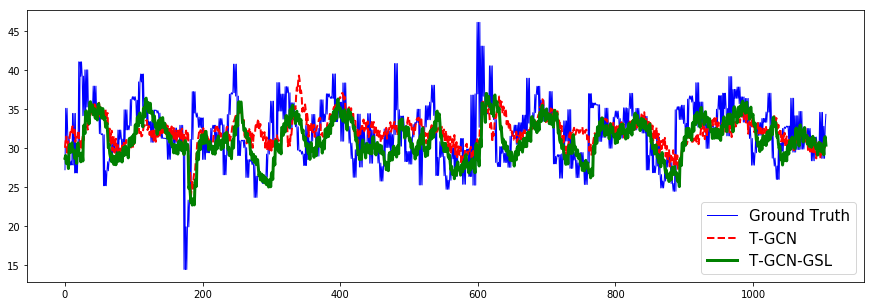

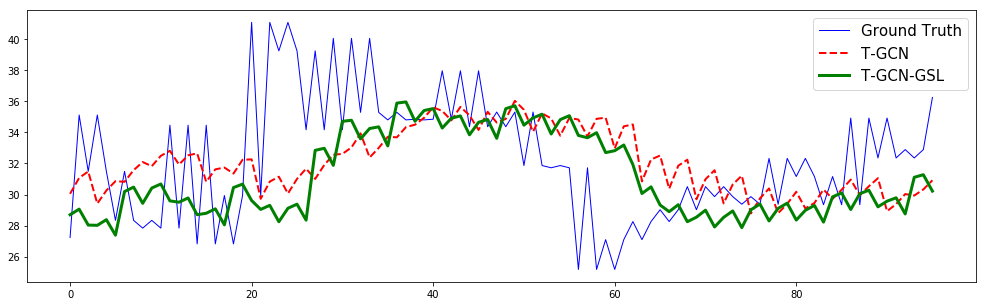

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
##compare all test result 
path = 'out/tgcn/tgcn_sz_lr0.001_batch32_unit64_seq12_pre3_epoch150_adj-dist/test_result.xlsx'
data = pd.read_excel(path, sheet_name='pred', header=None)
test_result = data.values
data = pd.read_excel(path, sheet_name='true', header=None)
true_labels = data.values

path = 'out/tgcn/tgcn_sz_lr0.001_batch32_unit64_seq12_pre3_epoch150_adj-gsl/test_result.xlsx'
data = pd.read_excel(path, sheet_name='pred', header=None)
test_result_gsl = data.values
# data = pd.read_excel(path, sheet_name='true', header=None)
# true_labels = data.values

path = 'out/tgcn'
fig1 = plt.figure(figsize=(15,5))
#    ax1 = fig1.add_subplot(1,1,1)
a_pred = test_result[:,0]
a_pred_gsl = test_result_gsl[:,0]
a_true = true_labels[:,0]
plt.plot(a_true,'b-',label='Ground Truth', linewidth=1.0)
plt.plot(a_pred,'r--',label='T-GCN', linewidth=2.0)
plt.plot(a_pred_gsl,'g-',label='T-GCN-GSL', linewidth=3.0)
plt.legend(loc='best',fontsize=15)
plt.savefig(path+'/compare_all.jpg')
plt.show()
## oneday test result visualization
fig1 = plt.figure(figsize=(17,5))
#    ax1 = fig1.add_subplot(1,1,1)
a_pred = test_result[:96,0]
a_pred_gsl = test_result_gsl[:96,0]
a_true = true_labels[0:96,0]
plt.plot(a_true,'b-',label='Ground Truth', linewidth=1.0)
plt.plot(a_pred,'r--',label='T-GCN', linewidth=2.0)
plt.plot(a_pred_gsl,'g-',label='T-GCN-GSL', linewidth=3.0)
plt.legend(loc='best',fontsize=15)
plt.savefig(path+'/test_oneday.jpg')
plt.show()
